In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
dataDIR = 'short'
DS = xr.open_dataset(dataDIR)

In [3]:
#Temperature:
T = (DS.T.values + DS.T0) * ((DS.P.values + DS.PB.values)/DS.P0)**(DS.R_D/DS.CP)

In [4]:
T.shape #days, height, latitude, longtitude

(240, 52, 36, 72)

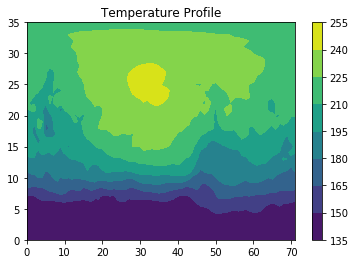

In [5]:
example_data = T[50,5,:, :]
plt.contourf(example_data)
plt.colorbar()
plt.title("Temperature Profile")
plt.show()

In [6]:
albedo = DS.ALBEDO.values

In [7]:
albedo.shape #days, latitude, longtitude

(240, 36, 72)

In [8]:
st = DS.TSK.values

In [9]:
st.shape

(240, 36, 72)

In [10]:
d_c = DS.TAU_OD.values

In [11]:
d_c.shape 

(240, 52, 36, 72)

In [12]:
tsf = DS.TOASW.values #top solar flux

In [13]:
tsf.shape

(240, 36, 72)

In [14]:
bsf = DS.GSW.values #bottom solar flux, ouput

In [15]:
bsf.shape

(240, 36, 72)

Let's combine the data together, for the equator line

In [16]:
e_in = [] #equator input
e_out = [] #equator output
e_t = [] #equator input and output
for i in range(240):
    for j in range(72):
        input_array = list(T[i,:,18,j]) #start with temp profile
        input_array+=list(d_c[i,:,18,j]) #add dust profile
        input_array.append(albedo[i,18,j])#add albedo
        input_array.append(st[i,18,j])#add surface temp
        input_array.append(tsf[i,18,j]) #add top solar flux
        e_in.append(input_array) #appends input to input array
        e_out.append(bsf[i,18,j]) #appends output to output array
        total_array = input_array + [bsf[i,18,j]] #adds input and output data together
        e_t.append(total_array) #appends everything to total array

In [17]:
e_t = np.array(e_t)
e_t.shape

(17280, 108)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(e_t)
a_t = scaler.transform(e_t)

In [19]:
e_t

array([[221.71524  , 231.7268   , 234.09593  , ..., 196.73923  ,
         49.710243 ,  20.28048  ],
       [214.26558  , 229.31334  , 231.98065  , ..., 187.20706  ,
          9.6728735,   2.855617 ],
       [210.16537  , 227.2537   , 229.8646   , ..., 180.2071   ,
          0.       ,   0.       ],
       ...,
       [231.45474  , 225.85812  , 223.97119  , ..., 273.35376  ,
        501.28662  , 353.60437  ],
       [237.45032  , 232.25151  , 230.5609   , ..., 278.08792  ,
        515.08673  , 364.20447  ],
       [241.38646  , 236.26865  , 234.6103   , ..., 281.30695  ,
        525.02045  , 371.4666   ]], dtype=float32)

In [20]:
a_t

array([[0.7235944 , 0.86352885, 0.8959441 , ..., 0.38041532, 0.09326209,
        0.0493786 ],
       [0.6461687 , 0.8367299 , 0.87118983, ..., 0.31293392, 0.01814741,
        0.00695281],
       [0.6035547 , 0.8138596 , 0.84642625, ..., 0.26337886, 0.        ,
        0.        ],
       ...,
       [0.8248186 , 0.7983631 , 0.77745795, ..., 0.92279553, 0.94047093,
        0.8609505 ],
       [0.8871317 , 0.8693553 , 0.8545749 , ..., 0.9563103 , 0.9663615 ,
        0.8867595 ],
       [0.9280405 , 0.9139615 , 0.9019637 , ..., 0.9790988 , 0.9849983 ,
        0.90444124]], dtype=float32)

In [21]:
scaler.inverse_transform(a_t) #we can inverse the scaling!

array([[221.71524  , 231.7268   , 234.09593  , ..., 196.73923  ,
         49.710243 ,  20.28048  ],
       [214.26556  , 229.31335  , 231.98065  , ..., 187.20708  ,
          9.6728735,   2.855617 ],
       [210.16537  , 227.25371  , 229.86458  , ..., 180.2071   ,
          0.       ,   0.       ],
       ...,
       [231.45474  , 225.85812  , 223.97119  , ..., 273.35376  ,
        501.28662  , 353.60437  ],
       [237.45033  , 232.25153  , 230.5609   , ..., 278.08792  ,
        515.08673  , 364.20447  ],
       [241.38646  , 236.26865  , 234.6103   , ..., 281.30695  ,
        525.02045  , 371.4666   ]], dtype=float32)

In [22]:
scaler2 = MinMaxScaler()
scaler2.fit(e_t[:,107].reshape(-1,1))
a_t_out = scaler2.transform(e_t[:,107].reshape(-1,1))

In [23]:
a_t_out

array([[0.0493786 ],
       [0.00695281],
       [0.        ],
       ...,
       [0.8609505 ],
       [0.8867595 ],
       [0.90444124]], dtype=float32)

In [24]:
scaler2.inverse_transform(a_t_out)

array([[ 20.28048 ],
       [  2.855617],
       [  0.      ],
       ...,
       [353.60437 ],
       [364.20447 ],
       [371.4666  ]], dtype=float32)

In [25]:
e_in = np.array(e_in)
e_out = np.array(e_out)

In [26]:
np.array_equal(e_in,e_t[:,:107])

True

In [27]:
np.array_equal(e_out,e_t[:,107]) #we can just use e_t array...

True

In [28]:
e_d = pd.DataFrame(e_t) 
e_d

,0,1,2,3,4,5,6,7,8,9,...,98,99,100,101,102,103,104,105,106,107
0,221.715240,231.726807,234.095932,234.503632,234.329010,233.942673,233.464264,232.940186,232.390991,231.818634,...,8.481921e-08,5.586889e-08,3.514140e-08,2.067390e-08,1.108751e-08,5.375729e-09,0.258120,196.739227,49.710243,20.280479
1,214.265579,229.313339,231.980652,233.091660,233.244293,233.042313,232.685272,232.249969,231.769409,231.259506,...,8.633013e-08,5.685386e-08,3.574981e-08,2.101948e-08,1.125893e-08,5.443385e-09,0.255179,187.207062,9.672873,2.855617
2,210.165375,227.253693,229.864594,231.590607,231.866180,231.756638,231.457138,231.062225,230.613007,230.131134,...,8.785055e-08,5.784503e-08,3.636205e-08,2.136724e-08,1.143143e-08,5.511467e-09,0.261824,180.207108,0.000000,0.000000
3,204.305664,220.883759,226.787598,229.156601,230.048355,230.277405,230.192307,229.942062,229.589310,229.168213,...,8.428513e-08,5.552072e-08,3.492633e-08,2.055174e-08,1.102691e-08,5.351814e-09,0.259610,176.107941,0.000000,0.000000
4,200.434067,214.538086,221.359314,224.568710,226.002594,226.618210,226.815628,226.775070,226.599731,226.295593,...,7.919467e-08,5.220223e-08,3.287652e-08,1.938745e-08,1.044937e-08,5.123874e-09,0.256876,171.112762,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17275,225.466187,220.502090,218.717804,217.574936,216.752670,216.058411,215.427002,214.830536,214.254379,213.691330,...,8.334755e-08,5.490969e-08,3.454911e-08,2.033771e-08,1.092101e-08,5.310336e-09,0.258621,264.080078,462.536316,321.594421
17276,227.451889,222.103149,220.236130,219.026154,218.162262,217.435730,216.776611,216.153748,215.552460,214.964127,...,8.425442e-08,5.550088e-08,3.491428e-08,2.054513e-08,1.102390e-08,5.350944e-09,0.252233,267.429535,483.725281,340.336151
17277,231.454742,225.858124,223.971191,222.743729,221.868713,221.133545,220.466843,219.837875,219.231857,218.640839,...,8.452836e-08,5.567946e-08,3.502459e-08,2.060779e-08,1.105498e-08,5.363210e-09,0.252611,273.353760,501.286621,353.604370
17278,237.450317,232.251511,230.560898,229.388550,228.522766,227.774963,227.085251,226.427170,225.788010,225.159653,...,8.415738e-08,5.543762e-08,3.487521e-08,2.052293e-08,1.101289e-08,5.346599e-09,0.252801,278.087921,515.086731,364.204468


In [29]:
e_rem0 = e_d[e_d.iloc[:,106] != 0] #removes rows with 0 top solar flux

In [30]:
e_d.iloc[:,107]

0         20.280479
1          2.855617
2          0.000000
3          0.000000
4          0.000000
            ...    
17275    321.594421
17276    340.336151
17277    353.604370
17278    364.204468
17279    371.466614
Name: 107, Length: 17280, dtype: float32

In [31]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(e_rem0, test_size=0.2, random_state=42)

In [32]:
train_set.shape

(7104, 108)

In [33]:
test_set.shape

(1776, 108)

In [34]:
train_in = train_set.iloc[:,:107] #training input
train_out = train_set.iloc[:,107] #training output
test_in = test_set.iloc[:,:107] #training input
test_out = test_set.iloc[:,107:] #training output

In [35]:
train_in.index #this provides the location of each point according to the date and latitude
indices = np.array(train_in.index)

In [36]:
np.array(train_in)

array([[2.1726593e+02, 2.1350037e+02, 2.1196017e+02, ..., 1.4097066e-01,
        2.4608109e+02, 3.9654755e+02],
       [2.4096600e+02, 2.3595958e+02, 2.3423830e+02, ..., 2.5517884e-01,
        2.7743903e+02, 5.0011188e+02],
       [2.4034036e+02, 2.3673810e+02, 2.3525616e+02, ..., 2.2926357e-01,
        2.6151074e+02, 3.9583932e+02],
       ...,
       [2.4322032e+02, 2.3897116e+02, 2.3741135e+02, ..., 2.5477865e-01,
        2.6974570e+02, 4.1648376e+02],
       [2.3738644e+02, 2.3340707e+02, 2.3186819e+02, ..., 2.6571336e-01,
        2.6044812e+02, 3.6956616e+02],
       [2.3530229e+02, 2.3214215e+02, 2.3093275e+02, ..., 2.0517617e-01,
        2.6264334e+02, 5.1263208e+02]], dtype=float32)

In [37]:
train_in

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
2640,217.265930,213.500366,211.960175,210.917984,210.146210,209.489426,208.891357,208.326508,207.783783,207.257339,...,8.358283e-08,5.723374e-08,3.788582e-08,2.403334e-08,1.436450e-08,7.957774e-09,4.140509e-09,0.140971,246.081085,396.547546
8569,240.966003,235.959579,234.238297,233.038284,232.135757,231.350677,230.623291,229.928024,229.251770,228.587036,...,1.263074e-07,8.621809e-08,5.678083e-08,3.570471e-08,2.099387e-08,1.124624e-08,5.438388e-09,0.255179,277.439026,500.111877
12555,240.340363,236.738098,235.256165,234.136368,233.253448,232.469727,231.736618,231.032349,230.345383,229.669052,...,9.955108e-08,6.806664e-08,4.494786e-08,2.839557e-08,1.684230e-08,9.186921e-09,4.625681e-09,0.229264,261.510742,395.839325
14204,180.059143,183.731873,187.839096,196.265366,211.442123,210.999130,210.879639,210.740723,210.712662,210.771622,...,7.835698e-08,5.368859e-08,3.557479e-08,2.260590e-08,1.355379e-08,7.555722e-09,3.981944e-09,0.265153,166.943878,52.282276
10817,231.022614,225.297241,223.350174,221.999786,221.010818,220.171585,219.410080,218.694382,218.007553,217.339661,...,6.941240e-08,4.762054e-08,3.161896e-08,2.016234e-08,1.216579e-08,6.867146e-09,3.710099e-09,0.281561,273.760223,500.310547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,227.114380,232.380737,233.175140,233.034241,232.632553,232.137665,231.604477,231.050354,230.483322,229.908371,...,1.003137e-07,6.858397e-08,4.528509e-08,2.860386e-08,1.696059e-08,9.245576e-09,4.648804e-09,0.205663,213.107254,9.133098
10126,207.817184,204.206635,202.728821,201.789825,201.110794,200.542923,200.042511,199.597916,199.204391,198.898987,...,8.333047e-08,5.706255e-08,3.777424e-08,2.396443e-08,1.432537e-08,7.938386e-09,4.132880e-09,0.245331,234.560699,359.698181
10484,243.220322,238.971161,237.411346,236.225784,235.307724,234.497467,233.742493,233.019135,232.314941,231.622604,...,8.563438e-08,5.862553e-08,3.879315e-08,2.459381e-08,1.468287e-08,8.115721e-09,4.202873e-09,0.254779,269.745697,416.483765
1665,237.386444,233.407074,231.868195,230.699768,229.795624,228.998810,228.257324,227.547974,226.858307,226.181030,...,8.612493e-08,5.895830e-08,3.901007e-08,2.472778e-08,1.475894e-08,8.153435e-09,4.217731e-09,0.265713,260.448120,369.566162


Let's try linear regression

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_in, train_out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
from sklearn.metrics import mean_squared_error

train_pred = lin_reg.predict(train_in) #prediction
lin_mse = mean_squared_error(train_out, train_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse 

3.7528121

In [40]:
train_in.shape

(7104, 107)

In [41]:
train_pred.shape

(7104,)

In [42]:
train_pred

array([322.7667 , 349.06992, 283.27304, ..., 295.13925, 260.1124 ,
       388.99228], dtype=float32)

In [43]:
train_out = np.array(train_out)

In [44]:
train_out.shape

(7104,)

In [45]:
days_list = []
l_list = []
for i in range(len(indices)):
    day = indices[i]//72
    l_point = indices[i]%72
    days_list.append(day)
    l_list.append(l_point)
days_list = np.array(days_list)
l_list = np.array(l_list)

Bad contour plot method (filling in gaps with average value):

In [46]:
"""
pred_contour = np.full((240, 72), np.average(train_pred))
days_list = []
l_list = []
for i in range(len(indices)):
    day = indices[i]//72
    l_point = indices[i]%72
    days_list.append(day)
    l_list.append(l_point)
    pred_contour[day][l_point] = train_pred[i]
days_list = np.array(days_list)
l_list = np.array(l_list)

out_contour = np.full((240, 72), np.average(train_out))

for i in range(len(indices)):
    day = indices[i]//72
    l_point = indices[i]%72
    out_contour[day][l_point] = train_out[i]
    
plt.contourf(out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux")
plt.xlabel("longtitude")
plt.ylabel("day")
plt.show()
plt.savefig("Actual")
"""

'\npred_contour = np.full((240, 72), np.average(train_pred))\ndays_list = []\nl_list = []\nfor i in range(len(indices)):\n    day = indices[i]//72\n    l_point = indices[i]%72\n    days_list.append(day)\n    l_list.append(l_point)\n    pred_contour[day][l_point] = train_pred[i]\ndays_list = np.array(days_list)\nl_list = np.array(l_list)\n\nout_contour = np.full((240, 72), np.average(train_out))\n\nfor i in range(len(indices)):\n    day = indices[i]//72\n    l_point = indices[i]%72\n    out_contour[day][l_point] = train_out[i]\n    \nplt.contourf(out_contour)\nplt.colorbar()\nplt.title("Actual Bottom Solar Flux")\nplt.xlabel("longtitude")\nplt.ylabel("day")\nplt.show()\nplt.savefig("Actual")\n'

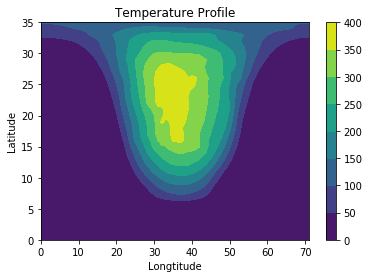

In [47]:
plt.contourf(bsf[1,:,:])
plt.colorbar()
plt.title("Temperature Profile")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.show()

In [48]:
pred_contour = np.full((240, 72), np.nan)

In [49]:
pred_contour

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [50]:
pred_contour = np.full((240, 72), np.nan)
days_list = []
l_list = []
for i in range(len(indices)):
    day = indices[i]//72
    l_point = indices[i]%72
    days_list.append(day)
    l_list.append(l_point)
    pred_contour[day][l_point] = train_pred[i]
days_list = np.array(days_list)
l_list = np.array(l_list)

out_contour = np.full((240, 72), np.nan)

for i in range(len(indices)):
    day = indices[i]//72
    l_point = indices[i]%72
    out_contour[day][l_point] = train_out[i]
    


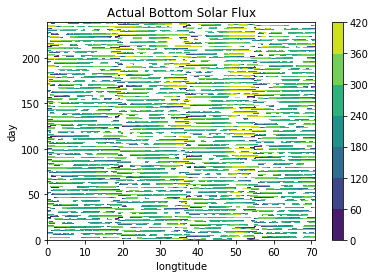

<Figure size 432x288 with 0 Axes>

In [51]:
plt.contourf(out_contour)
plt.colorbar()
plt.title("Actual Bottom Solar Flux")
plt.xlabel("longtitude")
plt.ylabel("day")
plt.show()
plt.savefig("Actual")

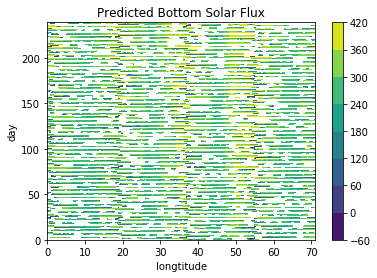

<Figure size 432x288 with 0 Axes>

In [52]:
plt.contourf(pred_contour)
plt.colorbar()
plt.title("Predicted Bottom Solar Flux")
plt.xlabel("longtitude")
plt.ylabel("day")
plt.show()
plt.savefig("Predicted")

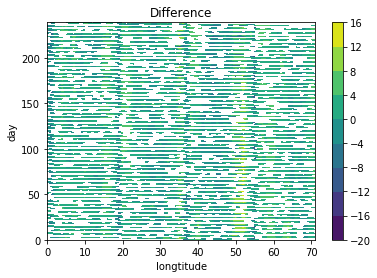

<Figure size 432x288 with 0 Axes>

In [53]:
plt.contourf(pred_contour - out_contour)
plt.colorbar()
plt.title("Difference")
plt.xlabel("longtitude")
plt.ylabel("day")
plt.show()

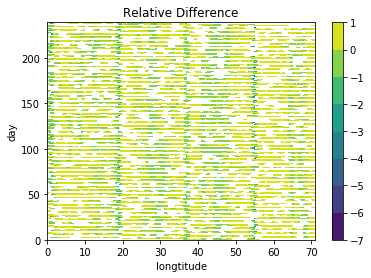

In [72]:
plt.contourf((pred_contour - out_contour)/out_contour)
plt.colorbar()
plt.title("Relative Difference")
plt.xlabel("longtitude")
plt.ylabel("day")
plt.show()

In [55]:
corr_matrix = e_d.corr()

In [56]:
coefficients = corr_matrix.iloc[:,107]

In [57]:
coefficients[:52] #temperature

0     0.736909
1     0.606773
2     0.518567
3     0.432219
4     0.367792
5     0.315021
6     0.275256
7     0.243601
8     0.215447
9     0.189032
10    0.156764
11    0.126433
12    0.101370
13    0.080297
14    0.051788
15    0.023783
16   -0.012175
17   -0.069813
18   -0.101063
19   -0.072736
20    0.044425
21    0.135187
22    0.205835
23    0.242987
24    0.258347
25    0.234141
26    0.141160
27    0.000238
28   -0.147368
29   -0.249324
30   -0.306729
31   -0.348940
32   -0.387446
33   -0.395269
34   -0.365810
35   -0.285679
36   -0.232303
37   -0.187120
38   -0.058104
39    0.145280
40    0.335841
41    0.463284
42    0.516391
43    0.476357
44    0.334785
45    0.152026
46    0.031495
47   -0.015819
48   -0.057126
49   -0.004264
50    0.146491
51    0.687656
Name: 107, dtype: float64

In [58]:
coefficients[52:104] #dust profile

52    -0.016757
53    -0.016755
54    -0.016752
55    -0.016748
56    -0.016745
57    -0.016744
58    -0.016743
59    -0.016742
60    -0.016741
61    -0.016739
62    -0.016738
63    -0.016736
64    -0.016734
65    -0.016731
66    -0.016729
67    -0.016724
68    -0.016719
69    -0.016703
70    -0.016676
71    -0.016635
72    -0.016575
73    -0.016485
74    -0.016349
75    -0.016142
76    -0.015822
77    -0.015338
78    -0.014624
79    -0.013602
80    -0.012163
81    -0.010212
82    -0.007636
83    -0.004397
84    -0.000473
85     0.004021
86     0.008762
87     0.012988
88     0.015932
89     0.015590
90    -0.008069
91    -0.016764
92    -0.016764
93    -0.016764
94    -0.016764
95    -0.016764
96    -0.016764
97    -0.016764
98    -0.016763
99    -0.016763
100   -0.016763
101   -0.016763
102   -0.016762
103   -0.016759
Name: 107, dtype: float64

In [59]:
coefficients[104] #albedo

-0.046151656577810944

In [60]:
coefficients[105] #surface temp

0.919865360926923

In [61]:
coefficients[106] #top solar flux

0.9974379705040396

In [62]:
coefficients[107] #bottom solar flux, should be 1

1.0

In [64]:
lin_reg.coef_[:52]

array([ -1.9985952 ,   2.0495827 ,  -0.5569055 ,  -0.05070615,
         0.8874599 ,  -0.9980174 ,   1.127172  ,  -1.9893408 ,
         4.0862494 ,  -7.3729506 ,  12.897492  , -14.053913  ,
        11.808876  ,  -9.0261135 ,   5.1086035 ,  -1.7601178 ,
        -1.526813  ,   1.2178055 ,   0.31122285,   0.6711577 ,
        -0.85715973,   0.2895329 ,   0.7494863 ,  -0.82073164,
         0.49265498,  -0.21910712,  -0.15810905,   0.54997426,
        -0.5124448 ,   1.1481025 ,  -0.3989633 ,   0.1584532 ,
        -0.10933009,  -0.47665453,   0.2522239 ,  -0.41241884,
         0.12136352,  -0.09470052,   0.23257017,  -0.2706561 ,
         0.06392014,  -0.0841713 ,   0.14673924,  -0.09627569,
        -0.1899867 ,   0.1440832 ,  -0.13207442,   0.03655219,
        -0.09580687,  -0.0153746 ,  -0.03571284,   0.1261617 ],
      dtype=float32)

In [65]:
lin_reg.coef_[52:104]

array([ 1.3318552e+02,  1.5013612e+02,  1.6910536e+02,  1.8543762e+02,
        1.8994479e+02,  1.8509595e+02,  1.7503139e+02,  1.6178535e+02,
        1.4726578e+02,  1.3274680e+02,  1.1751236e+02,  9.4263275e+01,
        7.2122681e+01,  4.9113182e+01,  2.6045002e+01, -1.2846584e+01,
       -5.2819962e+01, -1.5998711e+02, -2.9719482e+02, -4.3920590e+02,
       -5.8115942e+02, -7.1281653e+02, -8.2377478e+02, -8.9423267e+02,
       -8.9613269e+02, -7.8956689e+02, -5.3866211e+02, -1.2911662e+02,
        3.9660846e+02,  8.6527051e+02,  9.4786133e+02,  2.9105594e+02,
       -1.0513715e+03, -2.2972722e+03, -2.4957068e+03, -1.6239152e+03,
       -6.2269360e+02, -1.1256151e+02, -1.8826549e+00,  3.8197925e-03,
        2.8258108e-03,  2.0784538e-03,  1.5139672e-03,  1.0935196e-03,
        7.7927223e-04,  5.4422260e-04,  3.6776980e-04,  2.3856507e-04,
        1.4625237e-04,  8.1648868e-05,  3.8897277e-05,  1.3406239e-05],
      dtype=float32)

In [66]:
lin_reg.coef_[104]

-302.02628

In [69]:
lin_reg.coef_[105]

-0.039711177

In [67]:
lin_reg.coef_[106]

0.80957913

In [73]:
train_in

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,100,101,102,103,104,105,106
2640,217.265930,213.500366,211.960175,210.917984,210.146210,209.489426,208.891357,208.326508,207.783783,207.257339,...,8.358283e-08,5.723374e-08,3.788582e-08,2.403334e-08,1.436450e-08,7.957774e-09,4.140509e-09,0.140971,246.081085,396.547546
8569,240.966003,235.959579,234.238297,233.038284,232.135757,231.350677,230.623291,229.928024,229.251770,228.587036,...,1.263074e-07,8.621809e-08,5.678083e-08,3.570471e-08,2.099387e-08,1.124624e-08,5.438388e-09,0.255179,277.439026,500.111877
12555,240.340363,236.738098,235.256165,234.136368,233.253448,232.469727,231.736618,231.032349,230.345383,229.669052,...,9.955108e-08,6.806664e-08,4.494786e-08,2.839557e-08,1.684230e-08,9.186921e-09,4.625681e-09,0.229264,261.510742,395.839325
14204,180.059143,183.731873,187.839096,196.265366,211.442123,210.999130,210.879639,210.740723,210.712662,210.771622,...,7.835698e-08,5.368859e-08,3.557479e-08,2.260590e-08,1.355379e-08,7.555722e-09,3.981944e-09,0.265153,166.943878,52.282276
10817,231.022614,225.297241,223.350174,221.999786,221.010818,220.171585,219.410080,218.694382,218.007553,217.339661,...,6.941240e-08,4.762054e-08,3.161896e-08,2.016234e-08,1.216579e-08,6.867146e-09,3.710099e-09,0.281561,273.760223,500.310547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,227.114380,232.380737,233.175140,233.034241,232.632553,232.137665,231.604477,231.050354,230.483322,229.908371,...,1.003137e-07,6.858397e-08,4.528509e-08,2.860386e-08,1.696059e-08,9.245576e-09,4.648804e-09,0.205663,213.107254,9.133098
10126,207.817184,204.206635,202.728821,201.789825,201.110794,200.542923,200.042511,199.597916,199.204391,198.898987,...,8.333047e-08,5.706255e-08,3.777424e-08,2.396443e-08,1.432537e-08,7.938386e-09,4.132880e-09,0.245331,234.560699,359.698181
10484,243.220322,238.971161,237.411346,236.225784,235.307724,234.497467,233.742493,233.019135,232.314941,231.622604,...,8.563438e-08,5.862553e-08,3.879315e-08,2.459381e-08,1.468287e-08,8.115721e-09,4.202873e-09,0.254779,269.745697,416.483765
1665,237.386444,233.407074,231.868195,230.699768,229.795624,228.998810,228.257324,227.547974,226.858307,226.181030,...,8.612493e-08,5.895830e-08,3.901007e-08,2.472778e-08,1.475894e-08,8.153435e-09,4.217731e-09,0.265713,260.448120,369.566162


In [75]:
train_in2 = train_in.drop(train_in.columns[105], axis=1)
train_in2

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,106
2640,217.265930,213.500366,211.960175,210.917984,210.146210,209.489426,208.891357,208.326508,207.783783,207.257339,...,1.188361e-07,8.358283e-08,5.723374e-08,3.788582e-08,2.403334e-08,1.436450e-08,7.957774e-09,4.140509e-09,0.140971,396.547546
8569,240.966003,235.959579,234.238297,233.038284,232.135757,231.350677,230.623291,229.928024,229.251770,228.587036,...,1.799442e-07,1.263074e-07,8.621809e-08,5.678083e-08,3.570471e-08,2.099387e-08,1.124624e-08,5.438388e-09,0.255179,500.111877
12555,240.340363,236.738098,235.256165,234.136368,233.253448,232.469727,231.736618,231.032349,230.345383,229.669052,...,1.416752e-07,9.955108e-08,6.806664e-08,4.494786e-08,2.839557e-08,1.684230e-08,9.186921e-09,4.625681e-09,0.229264,395.839325
14204,180.059143,183.731873,187.839096,196.265366,211.442123,210.999130,210.879639,210.740723,210.712662,210.771622,...,1.113616e-07,7.835698e-08,5.368859e-08,3.557479e-08,2.260590e-08,1.355379e-08,7.555722e-09,3.981944e-09,0.265153,52.282276
10817,231.022614,225.297241,223.350174,221.999786,221.010818,220.171585,219.410080,218.694382,218.007553,217.339661,...,9.856844e-08,6.941240e-08,4.762054e-08,3.161896e-08,2.016234e-08,1.216579e-08,6.867146e-09,3.710099e-09,0.281561,500.310547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11125,227.114380,232.380737,233.175140,233.034241,232.632553,232.137665,231.604477,231.050354,230.483322,229.908371,...,1.427659e-07,1.003137e-07,6.858397e-08,4.528509e-08,2.860386e-08,1.696059e-08,9.245576e-09,4.648804e-09,0.205663,9.133098
10126,207.817184,204.206635,202.728821,201.789825,201.110794,200.542923,200.042511,199.597916,199.204391,198.898987,...,1.184752e-07,8.333047e-08,5.706255e-08,3.777424e-08,2.396443e-08,1.432537e-08,7.938386e-09,4.132880e-09,0.245331,359.698181
10484,243.220322,238.971161,237.411346,236.225784,235.307724,234.497467,233.742493,233.019135,232.314941,231.622604,...,1.217704e-07,8.563438e-08,5.862553e-08,3.879315e-08,2.459381e-08,1.468287e-08,8.115721e-09,4.202873e-09,0.254779,416.483765
1665,237.386444,233.407074,231.868195,230.699768,229.795624,228.998810,228.257324,227.547974,226.858307,226.181030,...,1.224721e-07,8.612493e-08,5.895830e-08,3.901007e-08,2.472778e-08,1.475894e-08,8.153435e-09,4.217731e-09,0.265713,369.566162


In [76]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_in2, train_out)

train_pred2 = lin_reg.predict(train_in2) #prediction for input without surface temp
lin_mse = mean_squared_error(train_out, train_pred2)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #error is slightly higher

3.8219717